## Sharan S
## Assignment - 13 - KNN - glass

## Prepare a model for glass classification using KNN

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [5]:
df=pd.read_csv("C:\\Users\\SHARAN\\Desktop\\ExcelR\\Assignment\\Assignment_13_KNN - no\\glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [35]:
labelencoder=LabelEncoder()
df.iloc[:,0]=labelencoder.fit_transform(df.iloc[:,0])
df.iloc[:,1]=labelencoder.fit_transform(df.iloc[:,1])
df.iloc[:,2]=labelencoder.fit_transform(df.iloc[:,2])
df.iloc[:,3]=labelencoder.fit_transform(df.iloc[:,3])
df.iloc[:,4]=labelencoder.fit_transform(df.iloc[:,4])
df.iloc[:,5]=labelencoder.fit_transform(df.iloc[:,5])
df.iloc[:,6]=labelencoder.fit_transform(df.iloc[:,6])
df.iloc[:,7]=labelencoder.fit_transform(df.iloc[:,7])
df.iloc[:,8]=labelencoder.fit_transform(df.iloc[:,8])
df.iloc[:,9]=labelencoder.fit_transform(df.iloc[:,9])

In [36]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,146,86,93,27,19,5,72,0,0,0
1,81,101,62,52,68,30,11,0,0,0
2,29,81,57,66,88,26,10,0,0,0
3,84,58,71,45,60,39,33,0,0,0
4,71,62,64,40,97,37,23,0,0,0
...,...,...,...,...,...,...,...,...,...,...
209,30,111,0,114,60,7,96,20,0,5
210,54,134,0,93,95,0,46,25,0,5
211,142,120,0,95,117,0,50,27,0,5
212,39,122,0,91,123,0,51,24,0,5


In [38]:
x=df.iloc[:,0:9]
y=df.iloc[:,9]

In [39]:
num_folds=10
kfold=KFold(n_splits=10)

In [44]:
model=KNeighborsClassifier(n_neighbors=5)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.6034632034632035


In [45]:
# Grid search for algorithm

In [48]:
import numpy
from sklearn.model_selection import GridSearchCV
array=df.values
n_neighbors=numpy.array(range(1,40))
param_grid=dict(n_neighbors=n_neighbors)


In [49]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [50]:
print(grid.best_score_)
print(grid.best_params_)

0.72015503875969
{'n_neighbors': 4}


In [51]:
# Visualization

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
# k is between (1,41)
k_range=range(1,41)
k_scores=[]
# iterations
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=5)
    k_scores.append(scores.mean())

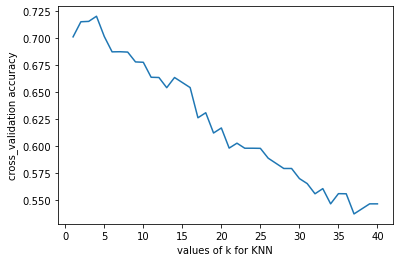

In [53]:
plt.plot(k_range,k_scores)
plt.xlabel('values of k for KNN')
plt.ylabel('cross_validation accuracy')
plt.show()

In [54]:
pd.DataFrame(k_scores).sort_values(0)

,0
36,0.537542
37,0.542193
39,0.546844
33,0.546844
38,0.546844
31,0.556146
35,0.556146
34,0.556257
32,0.560908
30,0.565559
